Relatório de classificação para classificador SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899


Confusion Matriz:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


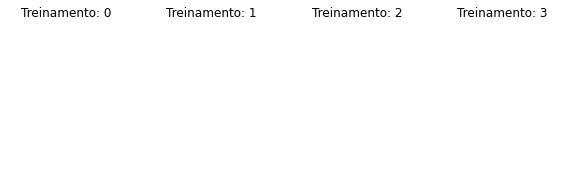

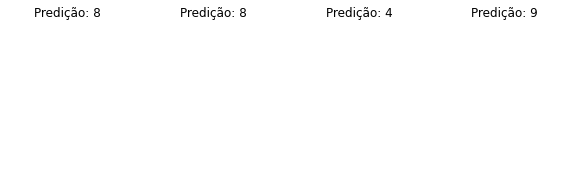

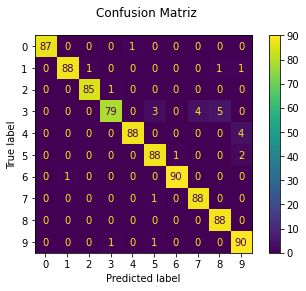

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
digits = datasets.load_digits()
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.set_title('Treinamento: %i ' % label)
n_samples= len(digits.images)
data = digits.images.reshape((n_samples,-1))
clf=svm.SVC(gamma=0.001)
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, prediction in zip(axes, X_test, predicted):
  ax.set_axis_off()
  image = image.reshape(8,8)
  ax.set_title(f'Predição: {prediction}')
print(f'Relatório de classificação para classificador {clf}:\n'
  f'{metrics.classification_report(y_test, predicted)}\n')
import pickle
modelo_treinado=pickle.dumps(clf)
modelo_carregado = pickle.loads(modelo_treinado)
modelo_carregado.predict([X_test[0]])
X_test[0]
modelo_carregado.predict([X_test[0]])
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle('Confusion Matriz')
print(f'Confusion Matriz:\n{disp.confusion_matrix}')

plt.show()